In [1]:
import pandas as pd

df = pd.read_csv('clean_car_data.csv')
df.head()

,gender,annual_income,dealer_name,company,model,engine,transmission,color,price_,dealer_no,body_style,dealer_region,price,sale_date,sale_month,sale_quarter,year
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown,26000.0,2022-01-02,2022-01,2022Q1,2022
1,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora,19000.0,2022-01-02,2022-01,2022Q1,2022
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,Greenville,31500.0,2022-01-02,2022-01,2022Q1,2022
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,Pasco,14000.0,2022-01-02,2022-01,2022Q1,2022
4,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,Janesville,24500.0,2022-01-02,2022-01,2022Q1,2022


In [2]:
# Seperate into target and predictor features
x = df.drop(['price'], axis=1)
y = df['price']

In [3]:
# One-Hot Encoding Step

# List of all the columns to encode from the dataframe
encoding_targets = ['gender', 'dealer_name', 'company', 'engine', 'transmission', 'color', 'dealer_no', 'body_style', 'dealer_region', 'sale_month', 'sale_quarter', 'year', 'model']
encoding_outputs = []

# Encode each column with the function pd.get_dummies, performing one-hot encoding on the dataset.
for col in encoding_targets:
    encoded = pd.get_dummies(x[col], prefix=col, dtype=int)
    encoding_outputs.append(encoded)
    print(f"Finished encoding {col}. Added {encoded.shape[1]} new columns.")

# Prints info about the final one-hot encoded dataframe
x = pd.concat(encoding_outputs, axis=1)
print(f"Finished all encoding. Total of {x.shape[1]} new columns created from {len(encoding_targets)} columns.")

Finished encoding gender. Added 2 new columns.
Finished encoding dealer_name. Added 28 new columns.
Finished encoding company. Added 30 new columns.
Finished encoding engine. Added 2 new columns.
Finished encoding transmission. Added 2 new columns.
Finished encoding color. Added 3 new columns.
Finished encoding dealer_no. Added 7 new columns.
Finished encoding body_style. Added 5 new columns.
Finished encoding dealer_region. Added 7 new columns.
Finished encoding sale_month. Added 24 new columns.
Finished encoding sale_quarter. Added 8 new columns.
Finished encoding year. Added 2 new columns.
Finished encoding model. Added 154 new columns.
Finished all encoding. Total of 274 new columns created from 13 columns.


In [4]:
from sklearn.model_selection import train_test_split

# Splits the data into 80% Training and 20% Testing/Validation sets; then splits the Test/Validation set into 10% Testing and 10% Validation sets.
trainX, tempX, trainY, tempY = train_test_split(x, y, test_size=0.2, random_state=9010)
valX, testX, valY, testY = train_test_split(tempX, tempY, test_size=0.5, random_state=9010)

In [5]:
from sklearn.ensemble import RandomForestRegressor as rfr

# Import and train a random forest regression model on our data
model = rfr(n_estimators = 100, random_state = 9010)
model.fit(trainX, trainY)

RandomForestRegressor(random_state=9010)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predY = model.predict(valX)
mse = mean_squared_error(valY, predY)
r2 = r2_score(valY, predY)
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 65832303.16230556
R^2: 0.7082444116575997


In [23]:
predY = model.predict(testX)
mse = mean_squared_error(testY, predY)
r2 = r2_score(testY, predY)
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 78367308.44594052
R^2: 0.6380467185574128


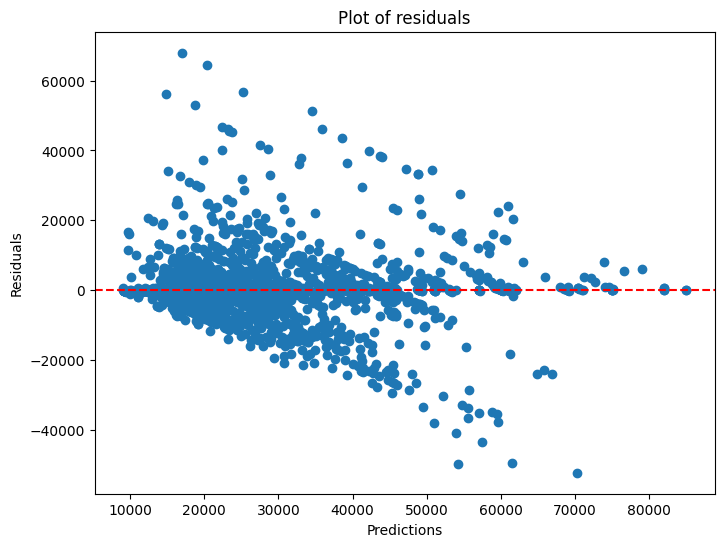

In [24]:
import matplotlib.pyplot as plt
residuals = testY-predY

plt.figure(figsize=(8, 6))
plt.scatter(predY, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0 for reference
plt.title('Plot of residuals')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()